In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [23]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [24]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

## Initialize Configs

In [25]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Student_Performance_Por'
EXPERIMENT_SESSION_UUID = '5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d'
# EXPERIMENT_SESSION_UUID = 'ac8635d8-9af0-41c0-816a-6ca2e4ad64dc'
# EXPERIMENT_SESSION_UUID = 'd1a5c7d4-9f88-47de-b872-3b6afaec580d'
# EXPERIMENT_SESSION_UUID = '860bd1b9-e881-4943-822f-4f8dd604428d'
# EXPERIMENT_SESSION_UUID = '5e69166c-e95f-41c8-b554-de7276d5bdf4'
SENSITIVE_ATTRS = ['sex']
MODEL_NAMES = ['LogisticRegression']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [26]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [27]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [28]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [29]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(18, 21)

In [30]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,Fair_Intervention_Params_Lst,Intervention_Param,overall,sex_dis,sex_dis_correct,sex_dis_incorrect,sex_priv,sex_priv_correct,sex_priv_incorrect,Test_Set_Index
0,Accuracy,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 18:11:01.042,5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d,Exp_iter_1,100,...,"[{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}]","{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}",0.840491,0.882979,1.000000,0.000000,0.782609,1.000000,0.000000,0
1,Aleatoric_Uncertainty,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 18:11:01.042,5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d,Exp_iter_1,100,...,"[{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}]","{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}",0.591796,0.591796,0.591796,0.591796,0.591796,0.591796,0.591796,0
2,F1,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 18:11:01.042,5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d,Exp_iter_1,100,...,"[{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}]","{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}",0.913333,0.937853,1.000000,0.000000,0.878049,1.000000,0.000000,0
3,FNR,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 18:11:01.042,5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d,Exp_iter_1,100,...,"[{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}]","{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}",0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0
4,FPR,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 18:11:01.042,5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d,Exp_iter_1,100,...,"[{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}]","{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}",1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,0
5,IQR,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 18:11:01.042,5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d,Exp_iter_1,100,...,"[{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}]","{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}",0.035767,0.035767,0.035767,0.035767,0.035767,0.035767,0.035767,0
6,Jitter,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 18:11:01.042,5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d,Exp_iter_1,100,...,"[{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}]","{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,Label_Stability,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 18:11:01.042,5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d,Exp_iter_1,100,...,"[{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}]","{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
8,Mean_Prediction,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 18:11:01.042,5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d,Exp_iter_1,100,...,"[{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}]","{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}",0.144841,0.144841,0.144841,0.144841,0.144841,0.144841,0.144841,0
9,Overall_Uncertainty,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 18:11:01.042,5daa2e4d-06a0-4bdd-9ac7-dd581fe9f87d,Exp_iter_1,100,...,"[{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}]","{'k': 5, 'Ax': 0.01, 'Ay': 1.0, 'Az': 50.0}",0.596778,0.596778,0.596778,0.596778,0.596778,0.596778,0.596778,0


In [31]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [32]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [33]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [34]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

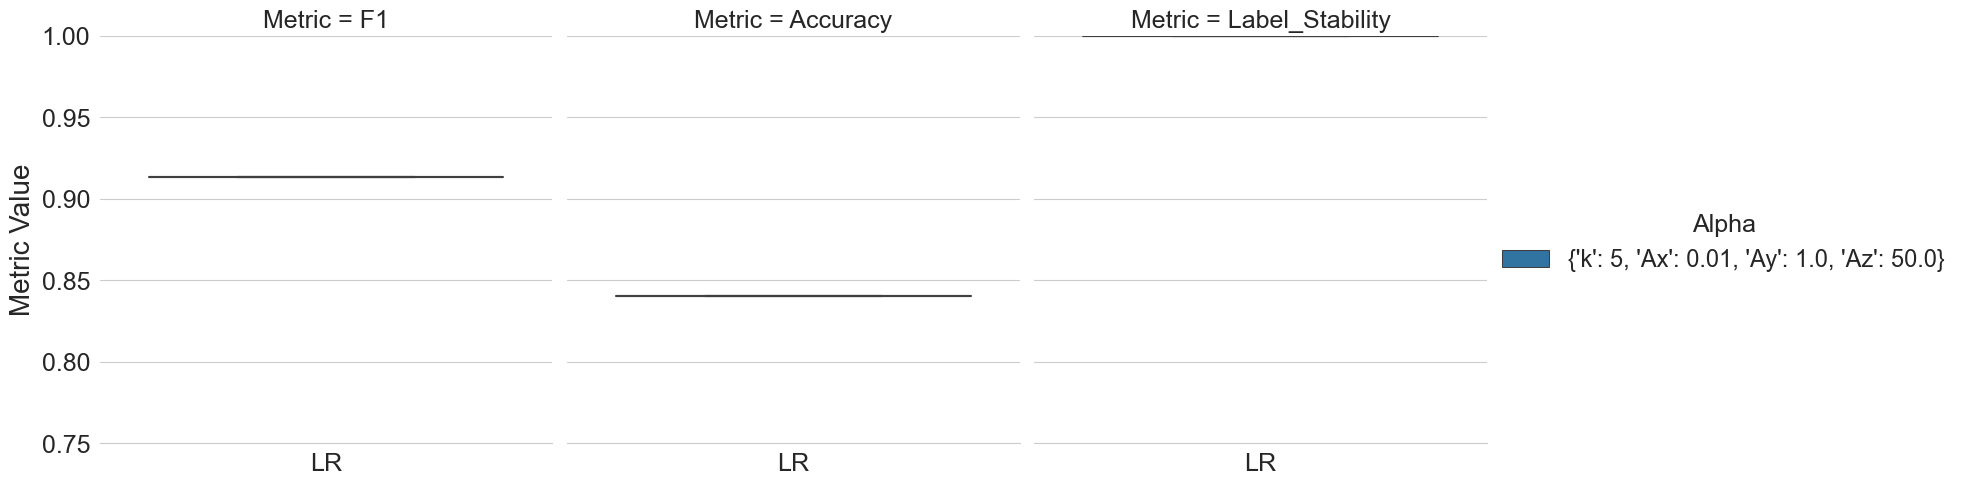

In [35]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

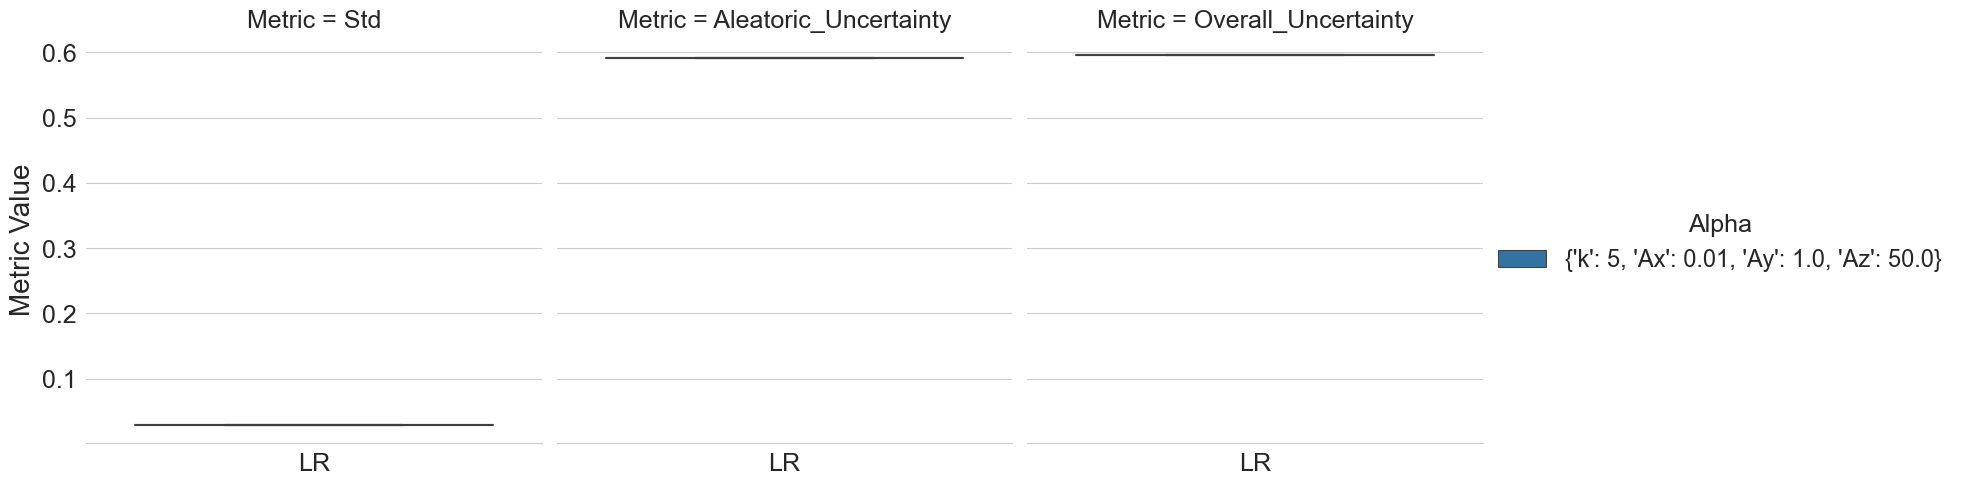

In [36]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_names=['Std', 'Aleatoric_Uncertainty', 'Overall_Uncertainty'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

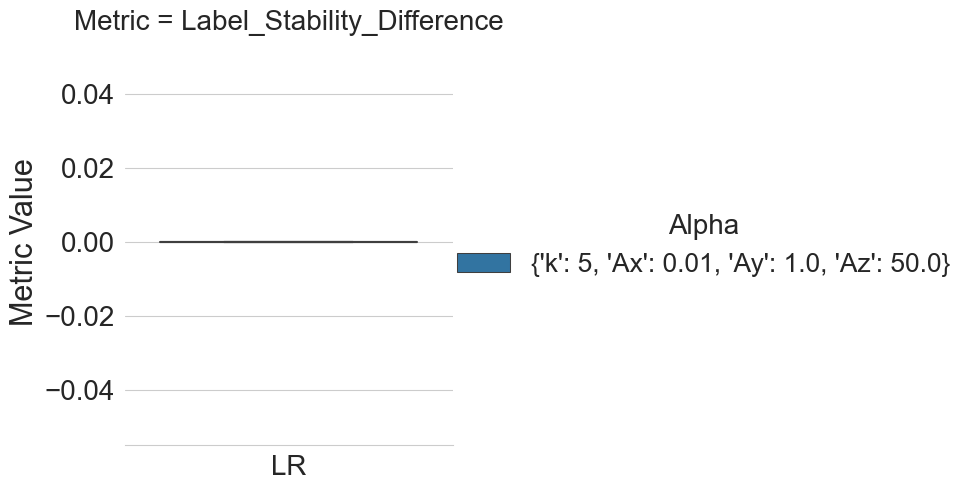

In [37]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

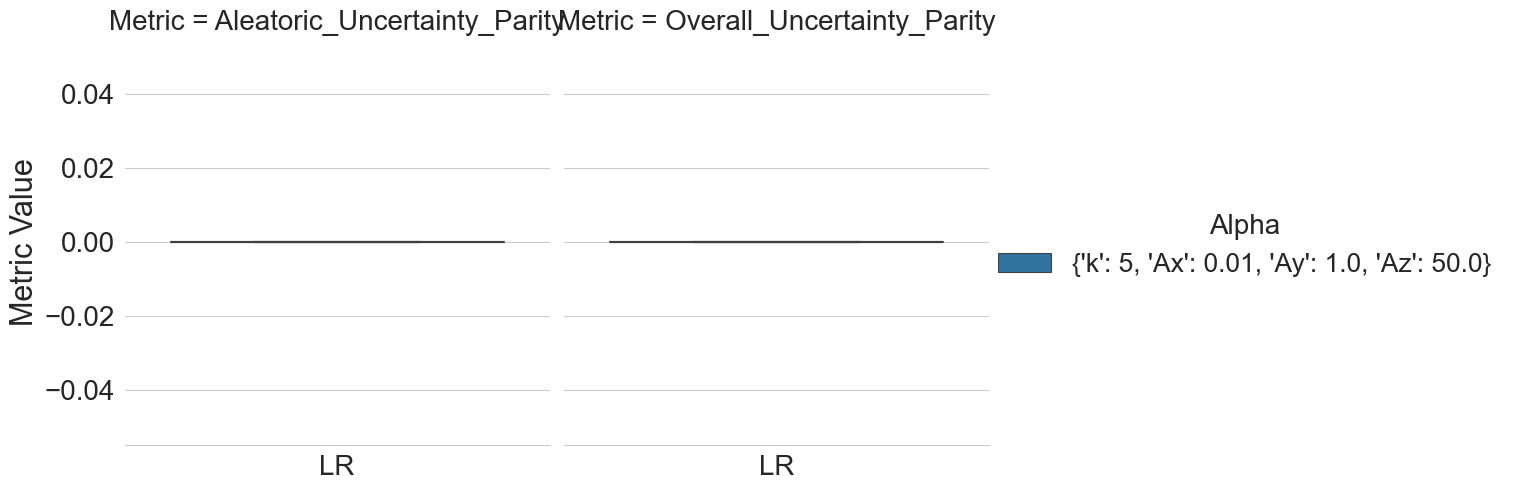

In [38]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Aleatoric_Uncertainty_Parity',
                                                         'Overall_Uncertainty_Parity'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

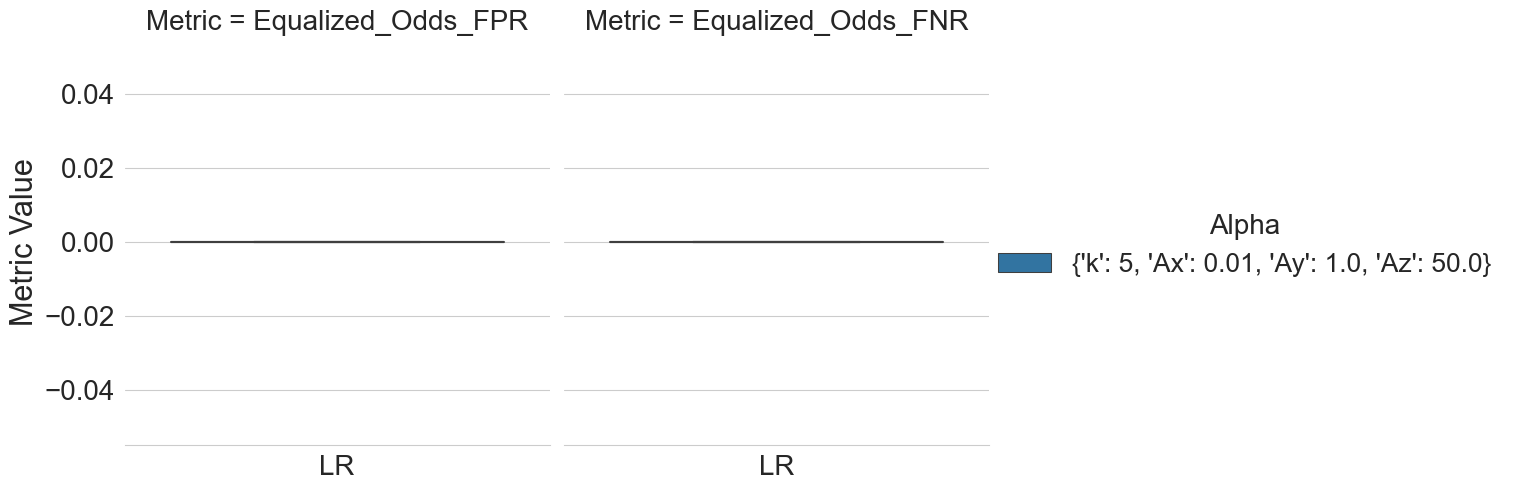

In [39]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

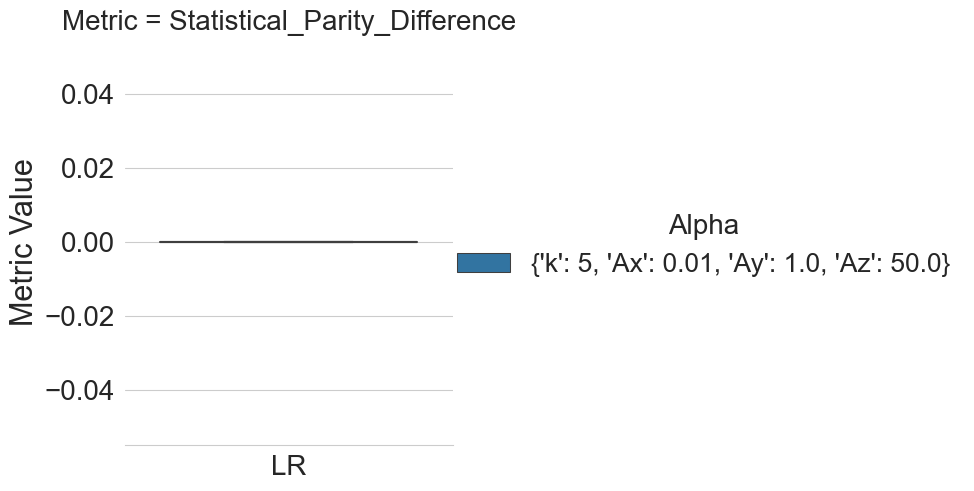

In [40]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)